**Table of contents**<a id='toc0_'></a>    
- [CHIMES Tutorial](#toc1_)    
  - [What is CHIMES ?](#toc1_1_)    
  - [chm toolkit (before hub)](#toc1_2_)    
  - [Map of the library](#toc1_3_)    
  - [DOING THE REAL STUFF](#toc1_4_)    
    - [What is the hub initialization doing ?](#toc1_4_1_)    
    - [Doing a run without changing values](#toc1_4_2_)    
      - [Saving your run](#toc1_4_2_1_)    
    - [The basic plot : temporal, grouped by units](#toc1_4_3_)    
    - [GET ACCESS TO DATA](#toc1_4_4_)    
      - [Technical point : the data shape](#toc1_4_4_1_)    
    - [Access to plots already existing](#toc1_4_5_)    
    - [Presets !](#toc1_4_6_)    
    - [THE INFAMOUS SET_DPARAM](#toc1_4_7_)    
    - [Stochastic dynamics](#toc1_4_8_)    
    - [Multiple regions Dynamics](#toc1_4_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[CHIMES Tutorial](#toc0_)

![Alt text](Graphs.png)

## <a id='toc1_1_'></a>[What is CHIMES ?](#toc0_)

**C**ore
**H**olistic
**I**intertwined
**M**odels
**E**ecological 
**S**ustainability

CHIMES is a numerical core. It goals are the following:
* Library of models in the litterature based on differential equations
* Methodology to couple them
* Set of tools to prototype, run, compare, analyze.

In consequence it is composed of :
* A `Model` base of files that contains  description, the mathematical logical links they are composed of, preset values, and supplements
* A `Field` base (any quantity measurable in the real world) with its name, unit and default value
* A `Data` base that contains value of the real world related to models (WIP)
* A method to load models and interact with it
* A solver library for high-speed simulation with a C core using an RK4 method
* An analysis library for statistical elements on runs
* A plot library to explore the output of simulation
* An interface to user-friendly experience


![Alt text](image.png)

## Importation

In [1]:
# CHIMES is a library that needs to be added to the path in order to be loaded. 
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\CHIMES" 
import sys
sys.path.insert(0, path)

# Homemade version of libraries installation
'''
import os 
import importlib.util
with open(os.path.join(path,'requirements.txt'),'rb') as f :
    out=str(f.read())
    libraries = out.split('\\r\\n')[1:]
    for l in libraries:
        if importli
        b.util.find_spec(l) is None:
            !{sys.executable} -m pip install {l}
        else: 
            print(l,'already installed')
'''
            
# Importing the library itself
import chimes as chm

#### VISUALISATION BONUS: Since we use an ipynb we can add more fancy stuff
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)

#%matplotlib widget
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False

from pandasgui import show

%matplotlib widget

<IPython.core.display.Javascript object>

## <a id='toc1_2_'></a>[chm toolkit (before hub)](#toc0_)

**ALWAYS USE TAB, AUTOINDENTATION, HELP( ), ? When exploring a library**

In [2]:
chm?

Type:        module
String form: <module 'chimes' from 'C:\\Users\\Paul Valcke\\Documents\\GitHub\\CHIMES\\chimes\\__init__.py'>
File:        c:\users\paul valcke\documents\github\chimes\chimes\__init__.py
Docstring:  
CHIMES:
Core for Holistic Intertwined Models of Ecological Sustainability

* Last update 2023/08/17
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in CHIMES, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models for ecological sustainability. 

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file and execute it line by line.

If you change code and functionality in the chimes folder, please do: 
* Update the tutorial 
* Update the unit tests in `te

In [3]:
for f in dir(chm):
    if f[0]!='_': print(f )

Hub
Interface
generate_dic_distribution
get_available_fields
get_available_functions
get_available_models
get_available_operators
get_available_plots
get_available_saves
get_model_documentation
load
plots


## <a id='toc1_3_'></a>[Map of the library](#toc0_)

**The important objects are:** 
* `Hub`        : Most important object. It reads a model and gives it all properties
* `get_available_[...]` methods: scan the library content
    * `get_available_models`   : all models files accessible with a short description `get_model_documentation` gives a deeper description
    * `get_available_saves`    : all saved run that can be loaded with `chm.load`
    * `get_available_fields`   : all quantities that exist in models with their default value, units and model that use them
    * `get_available_functions`: basic functions for each operators (to be removed)
    * `get_available_operators`: all non-trivial operators to write your model
    * `get_available_plots`    : all plots that can be activated for a Hub
* `get_model_documentation`: give full description of a model file
* `load`       : load a Hub saved somewhere else
* `Interface`  : an ipywidgets (in the future dashboard) interface for the model
* `generate_dic_distribution`  : toolbox elements for practical distribution

**Coming**
* `get_available_data`         : Database that can directly be loaded in the model


In [4]:
chm.get_available_models(verb = True)

UnboundLocalError: cannot access local variable 'address' where it is not associated with a value

In [ ]:
chm.get_model_documentation('LorenzSystem')

In [ ]:
chm.get_available_fields(
    exploreModels=True
)

In [ ]:
chm.get_available_plots()

In [ ]:
chm.get_available_operators()

In [ ]:
chm.get_available_saves()

## <a id='toc1_4_'></a>[Doing the real stuff: Hub](#toc0_)

Now we will load a model, and see what we can do with it

The **MOST IMPORTANT** element of chimes is the **Hub**. You will call it with a model inside of it, then interact with the model through the Hub.

A model is : 
* an ensemble of fields, quantities describing physical or informational values (temperature, employment)
* an equation associated to each of the field, determining its value over time, and how each fields are related to each others

there are three categories of possible equations : 
* **parameter :** the value is a constant (example, the gravitational constant, or the size of Mount Everest in a short-run simulation)
* **state variable :** the value is fully determined by every other fields ( the employment is determined by the quantity of workers and the population able to work, two other fields)
* **differential variables :** the variation of the value is a state variable : think about stock and flows : the variation of the stock is computed through the sum of the flow

It is possible that a same field is a parameter in some model (exogenous, constant), a state variable in other (instant adaptation), or a differential in others 

Here parameters are in blue, state variable yellow, differential variable in red. 
An simple criteria to know if it is an interesting model is "a model with loop in it, both positive and negative". 
On the left, the system is a Goodwin will its "extensive" equations, and on the right the dynamics on the phase-space. Both will solve the same overall thing

### <a id='toc1_4_1_'></a>[What is the hub initialization doing ?](#toc0_)

* Find what are all the fields that exist in the system
* Determine if they are differential, state variable, parameters
* Try to find as many existing information as possible (typically in a file called `_def_fields`) that has not been put by the model creator but exist in a common database. It can be :
    * units 
    * symbol
    * definition 
    * default value
    * ...
* Find an order to calculate the system at each timestep, and what variables are necessary (in loops)
* Preparing allocation for future time calculation
* A bit of coffee

In [ ]:
hub=chm.Hub('GK',preset=None,verb=True)

In [ ]:
hub

In [ ]:
for f in dir(hub):
    if f[0]!='_': print(f )

In [ ]:
hub.get_summary(idx=0,Region=0,removesector=())  # definition concern the field definition, com the way it is calculated

In [ ]:
hub.get_fieldsproperties()

In [ ]:
hub.get_dataframe(t0=0,t1=0).transpose()

In [ ]:
hub.get_equations_description()

In [ ]:
#hub.get_Network()
#hub.get_Network(params=True)                    # state,differential,parameters
hub.get_Network(auxilliary=False,params=True)   # remove auxilliary statevar and differential
#hub.get_Network(filters=('Pi',))                # remove the variable Pi and its connexions
#hub.get_Network(filters=('Pi',),redirect=True)  # all connexions from Pi are reconnected

In [ ]:
hubClimat= chm.Hub('Climate_3Layers')

In [ ]:
hubClimat.get_Network(params=True)

### <a id='toc1_4_2_'></a>[Doing a run without changing values](#toc0_)
Once the initial state is well determined, you can let the system loop on itself

In [ ]:
hub=chm.Hub('GK')
hub.run()#NstepsInput=1000,
        #NtimeOutput=1000,
        #verb=1)

### <a id='toc1_4_2_1_'></a>[Saving your run and loading another](#toc0_)

In [ ]:
hub.save('GeneratedTutorial',description='a GK generated in tutorial')

In [ ]:
chm.get_available_saves(returnas=True)

In [ ]:
newhub=chm.load('GeneratedTutorial')
newhub

### <a id='toc1_4_3_'></a>[Basic plot : temporal, grouped by units](#toc0_)
for the moment we do not talk about region, idx, sectors, which are properties for more advanced systems !

In [ ]:
help(hub.plot)
hub.plot()

In [ ]:
hub.plot(tend=20)

In [ ]:
hub.plot(filters_units=['',]) ### Only the dimensionless units
print(50*'#')
hub.plot(filters_units=('',)) ### Everything but the dimensionless units
print(50*'#')
hub.plot(filters_units=['','y'],
         filters_key=('kappa'),
         separate_variables={'':['employment','omega']},
         title='basic GK') ### Everything but the dimensionless units
         

### <a id='toc1_4_4_'></a>[Accessing data](#toc0_)
All data are in dparam of hub, as a dictionnary of (dictionnary of (dictionnary))
It could be transformed someday in pandas, if someone wants to do it (I have other things to do but that could be nice)

First layer : field name, 
second layer : field properties 

Same system of filters exist for `hub.get_dparam` with list and tuples

In [ ]:
help(hub.get_dparam)

In [ ]:
R=hub.get_dparam()
R1 = hub.get_dparam(key=['employment', 'omega'])
R2 = hub.get_dparam(key=('employment', 'omega'))
print(R.keys(),'\n',R1.keys(),'\n',R2.keys())

In [ ]:
R1['employment'].keys()

In [ ]:
print('\n\n BY UNITS FILTERED, WITHOUT PARAMETERS')
groupsoffields = hub.get_dparam_as_reverse_dict(
    crit='units',
    eqtype=['differential', 'statevar'])
for k,v in groupsoffields.items():
    print(k.ljust(25),list(v.keys()))
    
print('\n\n WITH PARAMETERS')
groupsoffields = hub.get_dparam_as_reverse_dict(
    crit='units',
    eqtype=['differential', 'statevar',None])
for k,v in groupsoffields.items():
    print(k.ljust(25),list(v.keys()))

#### <a id='toc1_4_4_1_'></a>[Technical point : the data shape](#toc0_)

`chimes` core is made to take into account complex problem, the maximum level for the moment is : 
* multiple system in parrallel with different parameters (not interacting but simulated in parrallel) : it allows statistical treatment on a high number of run, stochasticity, sensibility....
* multiple regions with the same description, interacting differently
* fields to be a vector (N sectors who has a different price)
* fields to be a matrix (coupling between sectors for example)

`chimes` is mostly based on a numpy implementation, dealing well with complex problem of dimensions. By default, all the fields will have values as a 5-dimensional tensor as follow : 
* **a** 'nt' number of timesteps (parameters do not have this one)
* **b** 'nx' number of parrallel system
* **c** 'nr' number of regions
* **d** number of sectors or `__ONE__`
* **e** number of sectors or `__ONE__` 

In consequence, if you want the field `field` value at time iteration **a**, on parrallel system **b**, on region **c**, between sector **d** and **e**, you want 
`R[field]['value'][a,b,c,d,e]`
If you have a monosectoral system with only one region, one parrallel system, and you want all the time values :
`R[field]['value'][:,0,0,0,0]`

In [ ]:
R=hub.get_dparam()
import numpy as np
np.shape(R['a']['value'])

In [ ]:
## Example : 
import matplotlib.pyplot as plt 
import numpy as np
R=hub.get_dparam(key=['employment','time'])
print(np.shape(R['employment']['value']))
x=R['time']['value'][:,0,0,0,0]
y=R['employment']['value'][:,0,0,0,0]
plt.close('all')
plt.plot(x,y)
plt.xlabel('time')
plt.ylabel('employment $\lambda$')
plt.show()

Fast access to data:

In [ ]:
dvalues = hub.get_dvalues()
plt.plot(dvalues['time'],dvalues['employment'])
plt.xlabel('time')
plt.ylabel('employment $\lambda$')
plt.show()


### <a id='toc1_4_5_'></a>[Using the plot library](#toc0_)
A lot of plot can be accessed, here is a few samples 

In [ ]:
help(chm.plots.Var)
chm.plots.Var(hub,'K',log=True)
chm.plots.Var(hub,'pi',mode='cycles',tend=50) # We ask him for cycles information. He will activate a toolbox for you to get the data
# sensitivity will be shown later (section set_dparam)

In [ ]:
help(chm.plots.XY)
chm.plots.XY(hub,
                     x='employment',
                     y='omega',
                     color='d')

In [ ]:
help(chm.plots.XYZ)
chm.plots.XYZ(hub, x='employment',
                 y='omega',
                 z='kappa',
                 color='pi',
                 idx=0,
                 title='')

In [ ]:
help(chm.plots.plotbyunits)
chm.plots.plotbyunits(hub) # same as hub.plot()


In [ ]:
help(chm.plots.cycles_characteristics)
chm.plots.cycles_characteristics(hub,'omega','employment',ref='pi',type1='stdval')

In [ ]:
help(chm.plots.plotnyaxis)
chm.plots.plotnyaxis(hub, x='time',
             y=[['employment', 'omega'],
                ['pi','kappa'],
                ['d'],
                ],
             idx=0,
             title='',
             tend=20,
             lw=2)

In [ ]:
### THis is boring on a "too simple" model, but will be great on some more advanced stuff
help(chm.plots.repartition)
chm.plots.repartition(hub,['C','Ir'],ref='Y',sector='')

### <a id='toc1_4_6_'></a>[Presets !](#toc0_)

If the modeller is a nice guy, he created some preset to show some of the model special cases. They contains : 
* specific set of parameters and initial conditions
* plots to put the properties under the spotlight


There are multiple way to load a preset from the start : 
* hub=chm.Hub('GK',preset=presetname)
* hub=chm.Hub('GK');hub.set_preset(presetname)


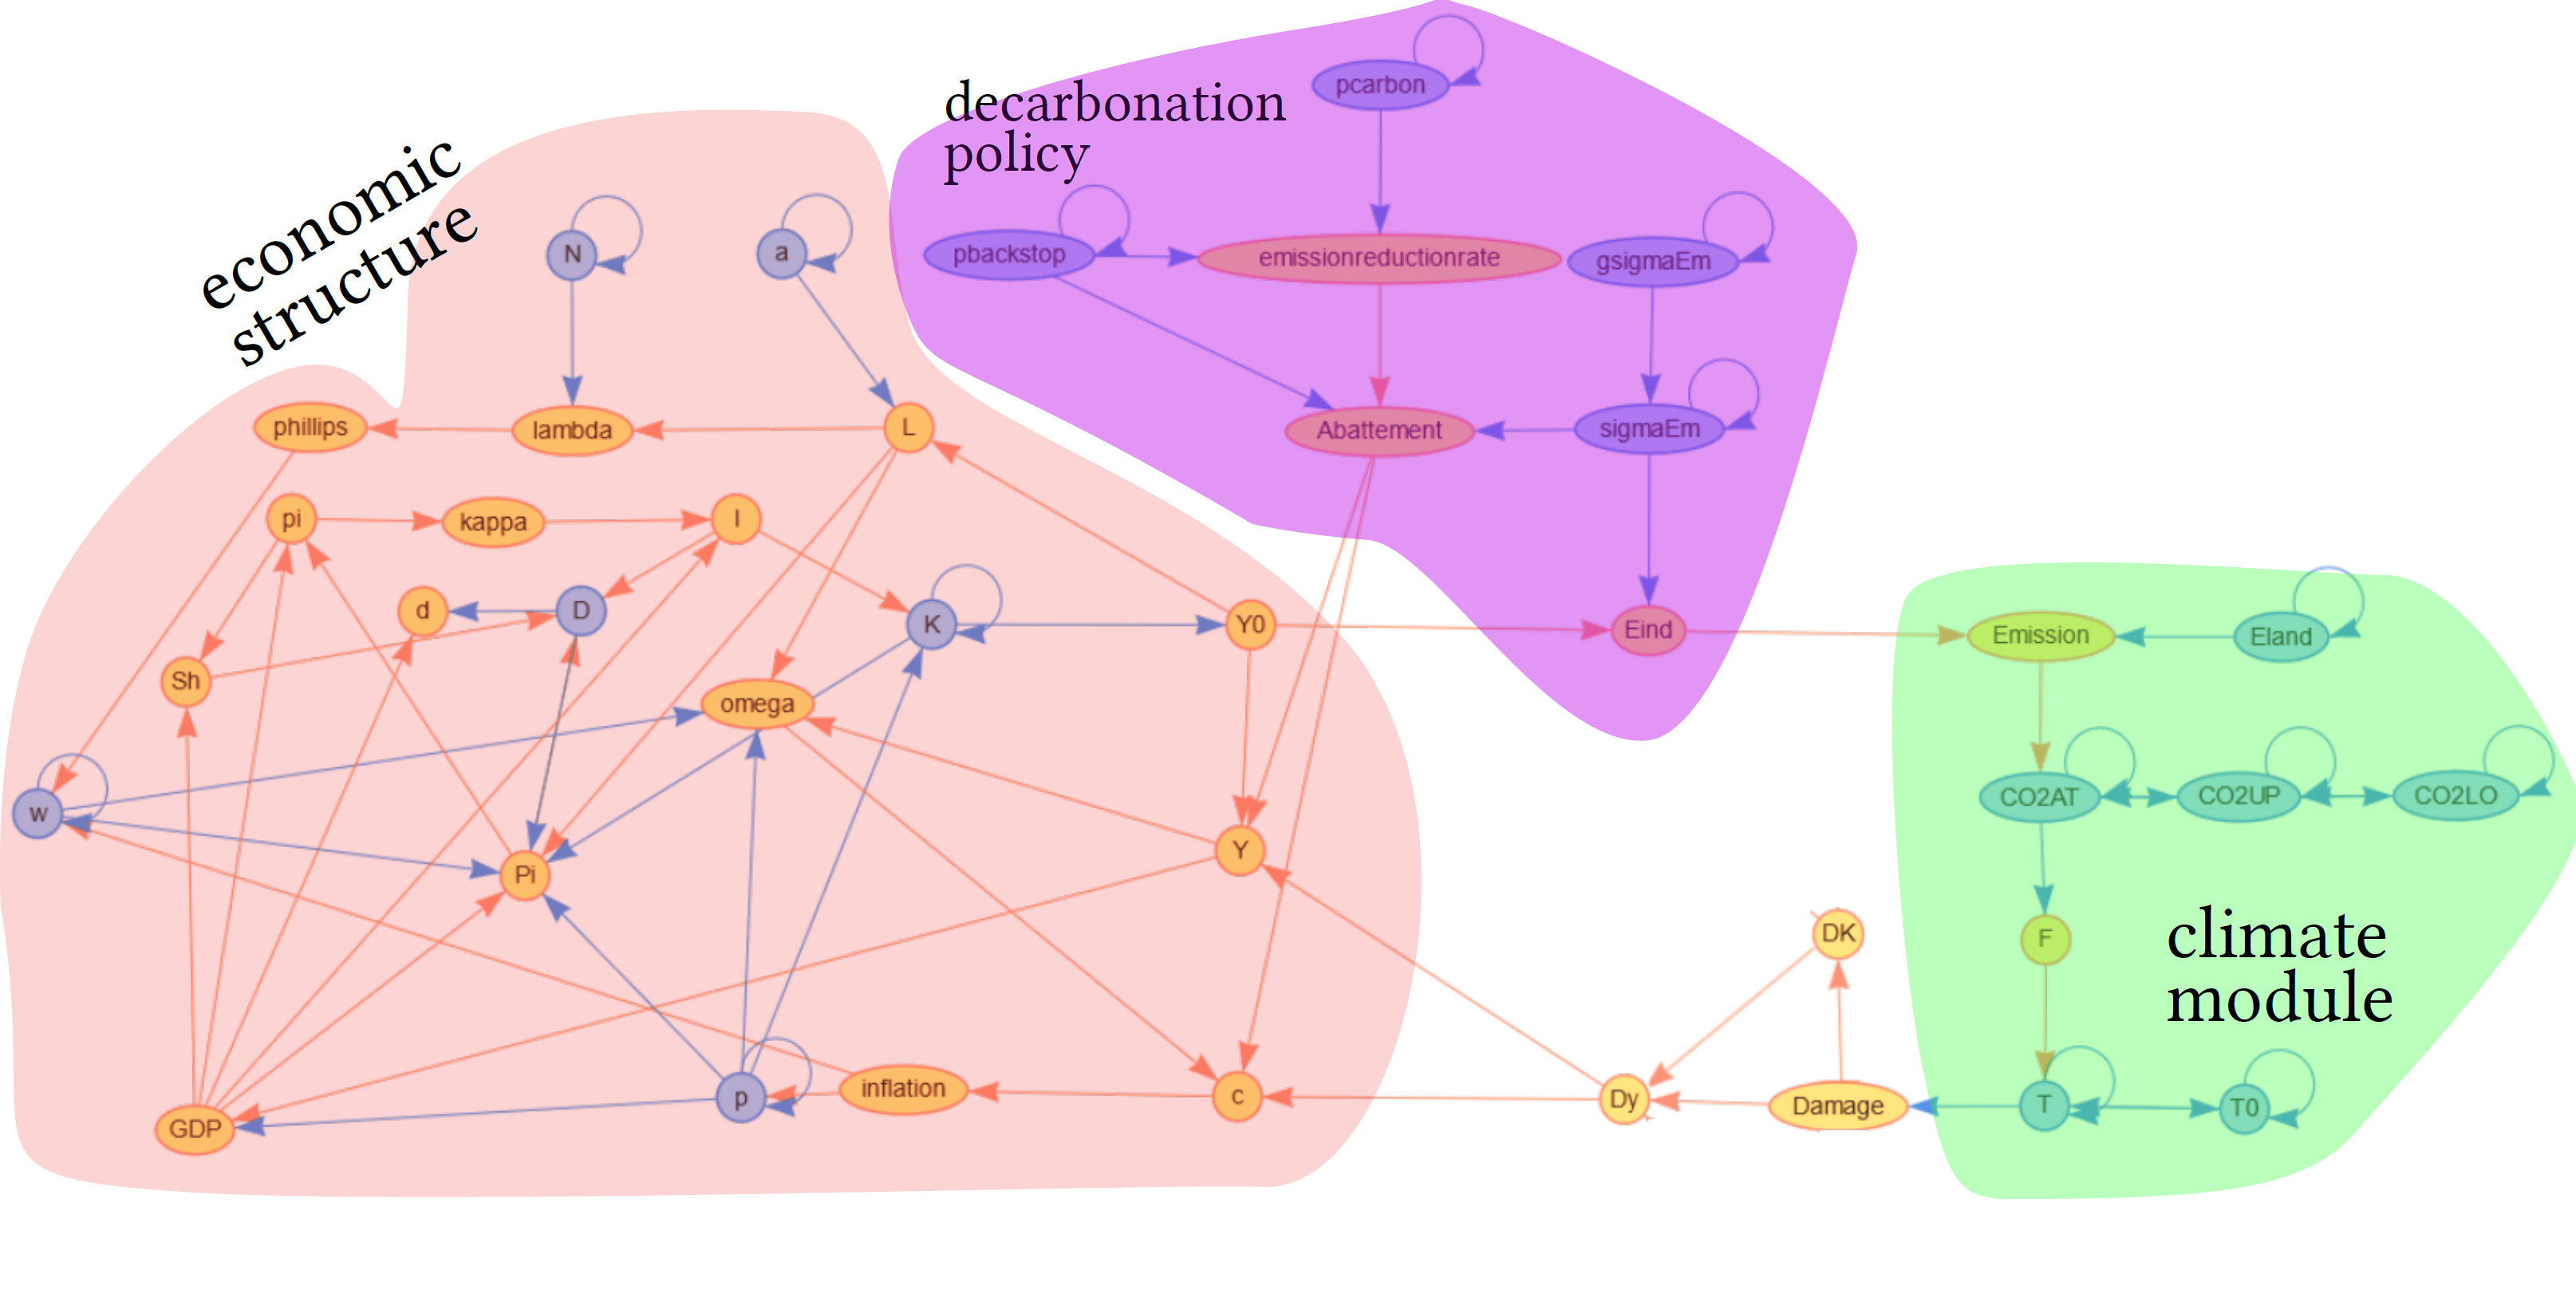

In [ ]:
hub=chm.Hub('LorenzSystem')#,preset='Canonical example')
presets = hub.get_presets()
print(presets)
hub.set_preset(list(presets.keys())[0],verb=True)
hub.run()
hub.plot_preset()

### <a id='toc1_4_7_'></a>[Changing values : DPARAM](#toc0_)

Behold ! 
This is the magic function which allow you to change any initial value or parameter, either socio-physical or purely numerical

In [ ]:
help(hub.set_dparam)

In [ ]:
# changing one value 
hub=chm.Hub('GK',verb=False)
hub.set_dparam(**{'alpha':0,
                  'n':0})
hub.get_summary()

In [ ]:
# PUTTING 5 VALUES 
import numpy as np
hub=chm.Hub('GK',verb=False)
hub.set_dparam(**{
    'nx':5,
    'alpha':np.linspace(0,0.1,5),})
hub.run()
chm.plots.Var(hub,'employment',mode='sensitivity')



In [ ]:
chm.plots.Var(hub,'employment',idx=4)

In [ ]:
# Putting values taken randomly in a distribution 
hub=chm.Hub('GK')
SensitivityDic = {
    'alpha': {'mu': .02,
              'sigma': .12,
              'type': 'log'},
    'mu': {'mu': 1.3,
           'sigma': .12,
           'type': 'log'},
}
presetSimple = chm.generate_dic_distribution(
    {'alpha': {'mu': 0.02,
               'sigma': .1,
               'type': 'log'}, }, N=1000)
presetCoupled = chm.generate_dic_distribution(SensitivityDic,
                                              N=100)


hub=chm.Hub('GK',verb=False)
hub.set_dparam(**presetCoupled)
hub.run()
hub.calculate_StatSensitivity()
chm.plots.Var(hub,'employment',mode='sensitivity',title='Ensemble of run for distributions')


### ADVANCED MODELS 
#### <a id='toc1_4_8_'></a>[Stochastic dynamics](#toc0_)

solve $\dot{y} = y \sigma$, with sigma a Gaussian noise

In [ ]:
hub=chm.Hub('stochastic')#,preset='10')
hub.set_dparam('nx',100)
hub.run()
hub.supplements['plot'](hub)
chm.plots.Var(hub,'y',mode='sensitivity')

#### <a id='toc1_4_9_'></a>[Multiple regions Dynamics](#toc0_)

$\dfrac{\partial C}{\partial t} = -D \dfrac{\partial^2 C}{\partial x^2}$ 

Becomes : 

$\dfrac{\partial C}{\partial t} = -D [\nabla ( \nabla (C))]$ 

With : 

$C= \begin{pmatrix} C_1 \\ C_2 \\ ... \\ C_N \end{pmatrix}$

$\nabla= \begin{pmatrix}
 0 & (2dx)^{-1} & 0     & ... & 0\\ 
-(2dx)^{-1}     & \ddots& \ddots & 0 & ... \\ 
0         & \ddots& \ddots & \ddots & 0 \\
...         & ...& \ddots & \ddots & \ddots  \end{pmatrix}$

Modulation of $\nabla$ for network dynamics ( tweaked finite differences methods) 

In [ ]:
hub=chm.Hub('PDE-Waves',preset='Basic')
#hub.get_summary()
hub.run()
hub.supplements['Plot'](hub)

#### Agent based model: A Vicksek model

There can be multiple agents interacting in the system. Agents can be "sector of the economy", "consumers" or anything else. 
This example is a clasic of bird movement synchronisation:

In [ ]:
chm.get_model_documentation('Agents_Vicsek')

In [ ]:
plt.close('all')
hub=chm.Hub('Agents_Vicsek')
for preset in ['synchronisation','TooNoisy','LowSync']:
    hub.set_preset(preset)#TooNoisy#
    hub.run()
    plt.figure(preset)
    hub.supplements['PlotTrajectories'](hub)
    #chm.plots.Var(hub,key='weightmeangle')

## WRITING YOUR MODEL FILES

In [ ]:
with open(path+'\\Tutorial-model.md', 'r') as fh: display(Markdown(fh.read()))

In [2]:
hub=chm.Hub('GK')

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']


In [6]:
df=hub.get_new_summary(minimal=False)

In [7]:
df.keys()

dict_keys(['Field Basic Properties', 'Parameters values', 'State Variables values', 'Differential Variables values'])

In [8]:
df['State Variables values']

field       value    
time                      
0.0           pi  0.146087
NaN           pi       NaN
0.0            d  0.130435
NaN            d       NaN
0.0        omega      0.85
NaN        omega       NaN
0.0   employment  0.766667
NaN   employment       NaN
0.0            c      0.85
NaN            c       NaN
0.0            g  0.034549
NaN            g       NaN
0.0            Y  0.766667
NaN            Y       NaN
0.0           Pi     0.112
NaN           Pi       NaN
0.0            I  0.090963
NaN            I       NaN
0.0            C  0.675703
NaN            C       NaN
0.0           Ir  0.090963
NaN           Ir       NaN
0.0            L  0.766667
NaN            L       NaN
0.0          GDP  0.766667
NaN          GDP       NaN
0.0    inflation    0.0525
NaN    inflation       NaN
0.0        kappa  0.118648
NaN        kappa       NaN
0.0     phillips -0.082457
NaN     phillips       NaN